In [2]:
import sys
sys.path.append('..')
from src.kitti import *
import numpy as np
import cv2
%matplotlib inline

Read frame transformations from KITTI sequence 00 into a list of frames (frame).

In [3]:
IMAGE_SIZE = 400

def load(file):
    keyframeids, frameids, poses = load_keyframes(file)
    return keyframeids, frameids, poses.reshape(poses.shape[0], 4, 4)

def load_csv(file):
    poses = np.genfromtxt(file, delimiter= " ")
    poses = np.hstack([poses, np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) ])
    return poses.reshape(poses.shape[0], 4, 4)

def transform(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[:i] = np.dot(points[:i], poses[i].T)
    return points
        
def transform2(poses):
    points = poses[:,:,3]
    return points
   
def transform3(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[i] = np.dot(points[i], poses[i].T)
    return points
    
def plot_trajectory(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1])

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = + pmin[1] / maxxy

    return np.dot(points, t.T)
    

def plot_trajectory2(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1]) * 1.01

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = IMAGE_SIZE / maxxy + pmin[1] / maxxy + 100
    return np.dot(points, t.T)
    
def plot_trajectory3(points):
    coords = []
    minx = min([p[0] for p in points])
    maxx = max([p[0] for p in points])
    miny = min([p[2] for p in points])
    maxy = max([p[2] for p in points])
    maxxy = max(maxx - minx, maxy - miny)* 1.01

    for p in points:
        #print(p)
        x = IMAGE_SIZE * (p[0] - minx) / (maxxy)
        z = IMAGE_SIZE - IMAGE_SIZE * (p[2] - miny) / (maxxy)
        coords.append([x, z])
    return coords

def new_image():
    img = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 3), np.uint8)
    img[:] = 255 #or img.fill(255)
    return img

def draw(coords, img, color = (0,0,0)):
    # Draw a black line with thickness of 2 px
    for i in range(1,len(coords)):
        cv2.line(img, (int(coords[i - 1][0]), int(coords[i - 1][1])), (int(coords[i][0]), int(coords[i][1])), color, 2)
    return img

In [4]:
set_sequence(7)

Compute the frame positions by mutiplying every point by a sequence of their transformations
vectorized to improve speed

folder = '/data/urbinn/datasets/urb_trajectory_output'
#folder = '/home/jeroen/notebooks/urb/resultsba'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%(sequence))

posesold = poses
points = transform(poses[:])
coords = plot_trajectory3(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(sequence))
pointsgt = transform2(gt)[:]
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

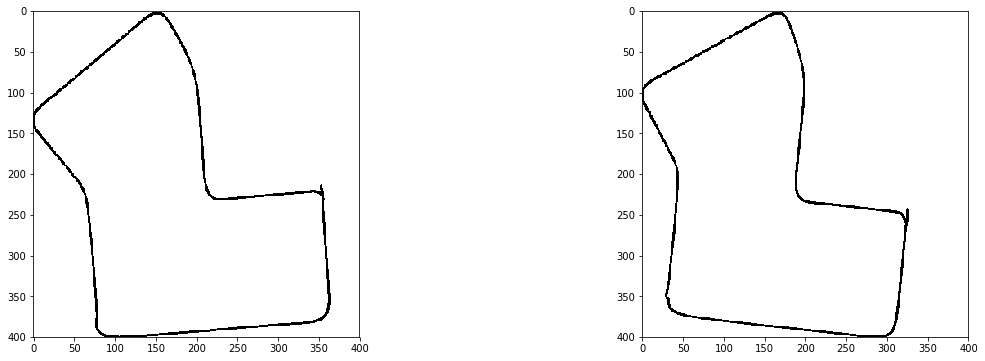

In [6]:
folder = '/data/urbinn/datasets/urb_trajectory_rotationfixed'
folder = '/home/jeroen/notebooks/urb/resultspose'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%get_sequence())

posesnew = poses
points = transform(poses[:])
coords = plot_trajectory3(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(get_sequence()))
pointsgt = transform2(gt)[:]
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

In [5]:
for i, xy in enumerate(coords):
    print(i, xy[0], xy[1])

0 359.501835043 3.9603960396
1 359.556249747 4.05426611383
2 359.613664641 4.15217855903
3 359.664528761 4.27182799043
4 359.71191804 4.40668668542
5 359.769728524 4.55438775738
6 359.817791191 4.70896714268
7 359.871773828 4.88181699143
8 359.918194358 5.07465976611
9 359.957454954 5.28119252639
10 359.9758136 5.47630750715
11 359.99250015 5.68270238437
12 360.009068001 5.86753690669
13 360.010387616 6.06445625859
14 359.998592647 6.26883521536
15 359.972811156 6.48754096302
16 359.931367424 6.71438122834
17 359.871320966 6.96773352082
18 359.798511267 7.23165577574
19 359.712206746 7.51681801008
20 359.606958782 7.81080761353
21 359.477501729 8.13151828915
22 359.333931863 8.44500810567
23 359.177282206 8.77128466386
24 358.993497382 9.11329725088
25 358.78736343 9.46433243639
26 358.562759624 9.82098691924
27 358.321192071 10.192747096
28 358.058845088 10.5827272291
29 357.781666239 10.990693102
30 357.493929344 11.4091970947
31 357.187059273 11.8397285079
32 356.867314325 12.287545

1054 14.6041393898 309.516846125
1055 14.6258522519 308.787437826
1056 14.6528391447 308.049428577
1057 14.6754365574 307.312193763
1058 14.7059666201 306.558370491
1059 14.7316035479 305.814603075
1060 14.7612867991 305.061764585
1061 14.7873527502 304.300716608
1062 14.8085657358 303.544713261
1063 14.828433931 302.788115544
1064 14.8501995007 302.028048892
1065 14.8732121398 301.25934719
1066 14.8895438713 300.491007351
1067 14.9109525696 299.738957861
1068 14.927097268 298.96688748
1069 14.9398522279 298.190938459
1070 14.9477194786 297.427322492
1071 14.9630564202 296.65635259
1072 14.9766673807 295.895215627
1073 14.9822830208 295.140894252
1074 14.9842557205 294.385766224
1075 14.9871811845 293.636681312
1076 14.9881036494 292.886403704
1077 14.9862580224 292.138908171
1078 14.9816485911 291.401430709
1079 14.9719806901 290.66374157
1080 14.9637645198 289.927223969
1081 14.94784985 289.213283911
1082 14.93960008 288.488967542
1083 14.9321679786 287.771023559
1084 14.9332554499 2

In [6]:
p = posesold.copy()
for i in range(1, len(p)):
    p[i] = np.dot( p[i-1], p[i] )
pterug = p.copy()
for i in range(len(p)-1, 0, -1):
    pterug[i] = np.dot( np.linalg.pinv(pterug[i-1]), pterug[i] )

print(posesold[:,2,3])
pterug[:,2,3]

NameError: name 'posesold' is not defined

Show the affine world coodinates for the first 3 poses

In [ ]:
points[:3]

show the converted x,y coordinates to plot the trajectory

In [ ]:
coords[:3]

In [ ]:
show(draw_frame(frame[3281]))